# MCP Evaluation Paper Version

In [21]:
import requests
import pandas as pd
import seaborn as sns

## Simple Question: Number of characters

### Scope: Play

#### What is the number of characters in Dantons Tod?
Other formulations:
* What is the number of dramatis personae in Dantons Tod?
* What is the number of characters in Dantons Tod in GerDraCor?
* What is the number of characters in Dantons Tod (buechner-dantons-tod) in GerDraCor?

In [11]:
def get_corpus_metadata_df(corpus):
    metadata_url = f"https://dracor.org/api/v1/corpora/{corpus}/metadata"
    response = requests.get(metadata_url)
    metadata_df = pd.DataFrame(response.json())
    return metadata_df

In [12]:
ger_df = get_corpus_metadata_df("ger")

In [13]:
ger_df[ger_df.name == "buechner-dantons-tod"].numOfSpeakers

101    103
Name: numOfSpeakers, dtype: int64

#### What is the number of characters in Der Nollhart?


In [14]:
ger_df[ger_df.name == "gengenbach-der-nollhart"].numOfSpeakers

175    14
Name: numOfSpeakers, dtype: int64

### Scope: Corpus 

#### What is the mean number of characters in French Drama?



In [15]:
fre_df = get_corpus_metadata_df("fre")

In [16]:
fre_df.numOfSpeakers.mean()

np.float64(9.195876288659793)

#### Which corpus has the highest mean number of characters?



In [17]:
metadata_url = f"https://dracor.org/api/v1/corpora?include=metrics"
response = requests.get(metadata_url)
corpora_meta = response.json()

In [18]:
speaker_number = {"name": [], "mean": []}
for entry in corpora_meta:
    mean = entry["metrics"]["characters"] / entry["metrics"]["plays"]
    speaker_number["name"].append(entry["name"])
    speaker_number["mean"].append(mean)

speaker_mean_df = pd.DataFrame(speaker_number)

In [19]:
speaker_mean_df.sort_values(by="mean")

,name,mean
20,yi,7.666667
6,fre,9.191237
18,tat,10.000000
11,ita,11.000000
9,greek,11.225000
13,rom,11.250000
17,swe,11.308824
12,pol,11.720000
4,dutch,11.761111
0,als,12.500000


## Medium Questions: Corpus Range, Female Speakers

#### Which corpus covers the widest time range?


In [8]:
corpus_min_max = {"name": [], "min":[], "max":[]}
for entry in corpora_meta:
    name = entry["name"]
    metadata_url = f"https://dracor.org/api/v1/corpora/{name}/metadata"
    response = requests.get(metadata_url)
    metadata_df = pd.DataFrame(response.json())
    corpus_min_max["name"].append(name)
    corpus_min_max["min"].append(metadata_df.yearNormalized.min())
    corpus_min_max["max"].append(metadata_df.yearNormalized.max())

In [9]:
corpus_min_max_df = pd.DataFrame(corpus_min_max) 
corpus_min_max_df["distance"] = corpus_min_max_df["max"] - corpus_min_max_df["min"]
corpus_min_max_df[corpus_min_max_df["distance"] == corpus_min_max_df["distance"].max()]

,name,min,max,distance
6,fre,1170.0,2017.0,847.0


In [10]:
corpus_min_max_df.sort_values(by="distance")

,name,min,max,distance
18,tat,1908.0,1912.0,4.0
20,yi,1907.0,1918.0,11.0
17,swe,1880.0,1900.0,20.0
15,shake,1591.0,1613.0,22.0
2,bash,1917.0,1975.0,58.0
16,span,1878.0,1945.0,67.0
8,gersh,1797.0,1890.0,93.0
5,eng,1552.0,1657.0,105.0
19,u,1813.0,1924.0,111.0
0,als,1816.0,1937.0,121.0


#### How does the percentage of female speakers in German drama change over time?


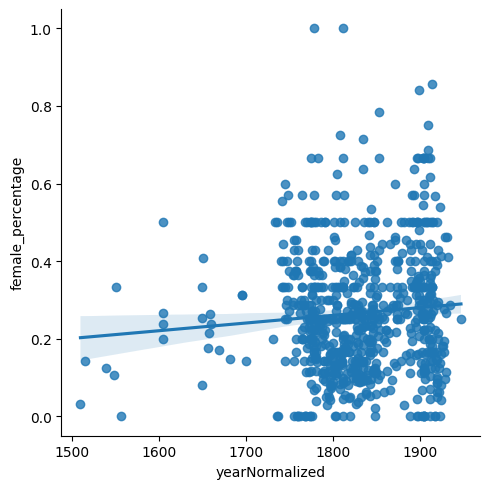

In [23]:
ger_df["female_percentage"] = ger_df["numOfSpeakersFemale"] / ger_df["numOfSpeakers"]
sns.lmplot(x='yearNormalized',y='female_percentage',data=ger_df,fit_reg=True) 

#### How does the mean percentage of female speakers in Swedish drama change over time?
* How does the gender distribution in Swedish drama change over time?

In [24]:
swe_df = get_corpus_metadata_df("swe")

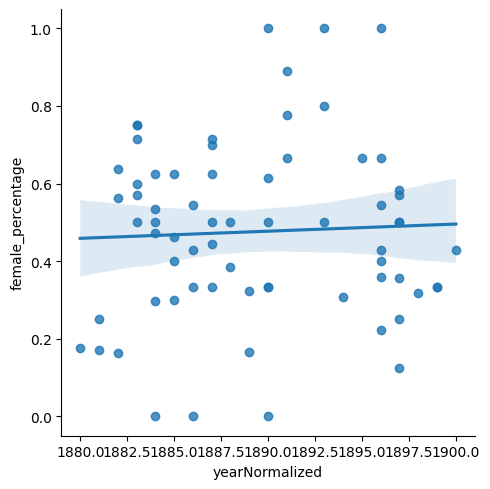

In [25]:
swe_df["female_percentage"] = swe_df["numOfSpeakersFemale"] / swe_df["numOfSpeakers"]
sns.lmplot(x='yearNormalized',y='female_percentage',data=swe_df,fit_reg=True) 

#### How does the percentage of female speakers in a ItaDraCor change over time?


In [26]:
ita_df = get_corpus_metadata_df("ita")

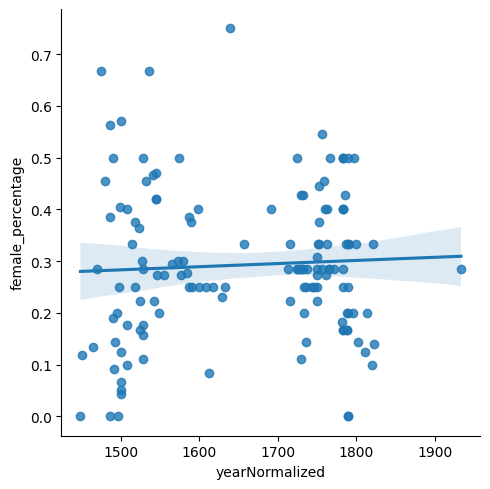

In [27]:
ita_df["female_percentage"] = ita_df["numOfSpeakersFemale"] / ita_df["numOfSpeakers"]
sns.lmplot(x='yearNormalized',y='female_percentage',data=ita_df,fit_reg=True) 

In [29]:
def get_century(year):
    year = year + 100
    year = str(year)
    century = year[:2] + "th"
    return century

In [32]:
ita_df["century"] = ita_df.yearNormalized.apply(lambda x: get_century(x))

<Axes: xlabel='century'>

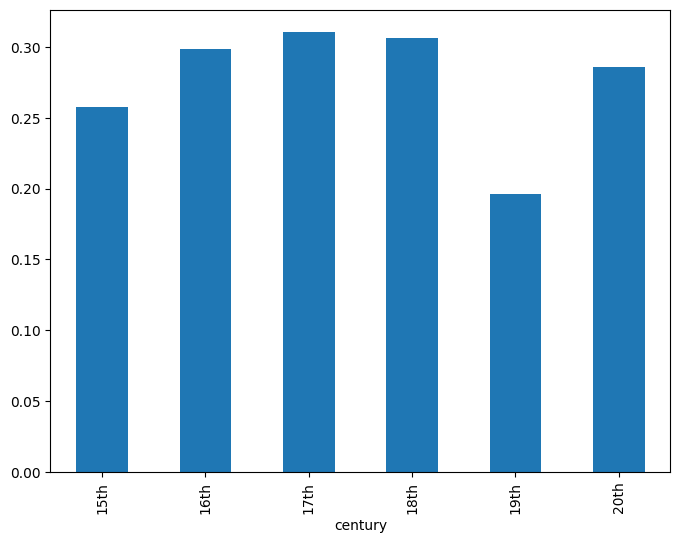

In [33]:
ita_df.groupby("century")["female_percentage"].mean().plot(kind="bar", figsize=(8,6))

## Hard Questions: Protagonist 

In [36]:
def get_protagonist_data(metadata_df):
    protagonist_columns = ["numOfScenes", "numOfSpeechActs", "numOfWords", "degree", "weightedDegree",
                           "eigenvector", "closeness", "betweenness"]
    protagonist_data = {}
    for column in protagonist_columns:
        protagonist_data[column] = [metadata_df[metadata_df[column] == metadata_df[column].max()].id.values[0]]
    protagonist_df = pd.DataFrame(protagonist_data)
    return protagonist_df

### Who is the most important character in Emilia Galotti?
Other formulations:
* Who is the protagonist in Emilia Galotti?
* Which character is quantitatively most dominant in Emilia Galotti?

In [37]:
corpus = "ger"
play = "lessing-emilia-galotti"
metadata_url = f"https://dracor.org/api/v1/corpora/{corpus}/plays/{play}/characters"
response = requests.get(metadata_url)
metadata_emilia_df = pd.DataFrame(response.json())

In [38]:
protagonist_emilia_df = get_protagonist_data(metadata_emilia_df)
protagonist_emilia_df

,numOfScenes,numOfSpeechActs,numOfWords,degree,weightedDegree,eigenvector,closeness,betweenness
0,marinelli,marinelli,marinelli,marinelli,marinelli,marinelli,marinelli,der_prinz


### Who is the protagonist in Die entführte Dose?

In [39]:
corpus = "ger"
play = "schlegel-die-entfuehrte-dose"
metadata_url = f"https://dracor.org/api/v1/corpora/{corpus}/plays/{play}/characters"
response = requests.get(metadata_url)
metadata_dose_df = pd.DataFrame(response.json())

In [40]:
protagonist_dose_df = get_protagonist_data(metadata_dose_df)
protagonist_dose_df

,numOfScenes,numOfSpeechActs,numOfWords,degree,weightedDegree,eigenvector,closeness,betweenness
0,foppendorf,foppendorf,foppendorf,foppendorf,foppendorf,foppendorf,foppendorf,foppendorf
